In [ ]:
import numpy as np
import pandas as pd
import os

train_df=pd.read_csv("/content/train.csv")
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def preprocess_text2(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

from bs4 import BeautifulSoup
def clean_text(text):
    # Menghapus tag HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus karakter non-ASCII kecuali titik
    text = re.sub(r'[^\x00-\x7F.]', ' ', text)
    # Menghapus karakter khusus kecuali titik
    text = re.sub(f'[{re.escape(string.punctuation.replace(".", ""))}]', '', text)
    # Menghapus angka yang terpisah
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    # Menghapus spasi ganda setelah titik
    text = re.sub(r'(?<=\.)\s+', ' ', text).strip()
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
clean_data=lambda text:clean_text(text)
train_df["clean_text"]=train_df["text"].apply(clean_data)

<ipython-input-2-2c49a32f4f22>:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
train_df

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary TheTawniest The out of control wild...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1. UTC5km S of Volcano Hawaii.
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...


In [ ]:
train_df.at[21,"text"]

'London is cool ;)'

In [ ]:
train_df.at[21,"clean_text"]

'London is cool'

In [ ]:
preprocess_data=lambda text:preprocess_text(text)
train_df["text_prepro"]=train_df["clean_text"].apply(preprocess_data)

In [ ]:
train_df

,id,keyword,location,text,target,clean_text,text_prepro
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask . canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,resid ask shelter place notifi offic . evacu s...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,two giant crane hold bridg collaps nearbi home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary TheTawniest The out of control wild...,ariaahrari thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1. UTC5km S of Volcano Hawaii.,m1 . utc5km volcano hawaii .
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...,polic investig ebik collid car littl portug . ...


In [ ]:
X=train_df.drop(["id","keyword","location","text","target","clean_text"],axis=1)
y=train_df["target"]

In [ ]:
X

,text_prepro
0,deed reason earthquak may allah forgiv us
1,forest fire near la rong sask . canada
2,resid ask shelter place notifi offic . evacu s...
3,peopl receiv wildfir evacu order california
4,got sent photo rubi alaska smoke wildfir pour ...
...,...
7608,two giant crane hold bridg collaps nearbi home
7609,ariaahrari thetawniest control wild fire calif...
7610,m1 . utc5km volcano hawaii .
7611,polic investig ebik collid car littl portug . ...


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [ ]:
tokenized_documents=[preprocess_text2(doc) for doc in X["text_prepro"]]

In [ ]:
len(tokenized_documents)

7613

In [ ]:
tokenized_documents[0],tokenized_documents[1]

(['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us'],
 ['forest', 'fire', 'near', 'la', 'rong', 'sask', '.', 'canada'])

In [ ]:
from gensim.models import Word2Vec
ukuran_vektor=100
word2vec_model = Word2Vec(sentences=tokenized_documents,
                          min_count=1, vector_size=ukuran_vektor,sg=1)

In [ ]:
word2vec_model

In [ ]:
unique_words = len(word2vec_model.wv)
print("Unique_words:", unique_words)

Unique_words: 14050


In [ ]:
all_words =word2vec_model.wv.index_to_key
print("first 20 model Word2Vec:")
for index, word in enumerate(all_words):
    if index < 20:
        print(f"{word} : {index}")
    else:
        break

first 20 model Word2Vec:
. : 0
like : 1
fire : 2
get : 3
im : 4
bomb : 5
new : 6
via : 7
one : 8
peopl : 9
go : 10
news : 11
dont : 12
burn : 13
kill : 14
video : 15
flood : 16
crash : 17
time : 18
emerg : 19


In [ ]:
sequences = [[word2vec_model.wv.key_to_index[word] for word in text]
             for text in [preprocess_text2(doc) for doc in train_df['text_prepro']]]

In [ ]:
print(sequences)

[[4670, 476, 217, 87, 1483, 3682, 42], [142, 2, 188, 595, 5417, 5437, 0, 1041], [1484, 529, 1885, 389, 5490, 225, 0, 35, 1885, 389, 341, 442], [9, 2465, 98, 35, 341, 45], [41, 1063, 143, 5188, 1583, 212, 98, 2488, 132], [2536, 201, 45, 1459, 0, 337, 798, 469, 893, 345, 2, 5193, 98], [16, 20, 707, 174, 63, 708, 16, 462, 5470, 898, 816, 233], [4, 191, 1168, 38, 2, 1982], [264, 19, 35, 192, 22, 726, 462], [4, 2330, 348, 40, 233], [502, 9, 109, 247, 113, 531], [771, 503, 2778, 3, 16, 3693, 332, 404, 50, 503, 2778, 252, 106, 252, 106, 5400, 16], [174, 16, 1454, 5404, 2778, 29, 0, 295, 629, 3694], [16, 5225, 783, 728, 5225], [127, 132, 306, 5229, 57, 17, 185], [521, 56], [31, 1539], [294, 31], [57, 630], [5507], [2149], [982, 441], [31, 2831], [508, 29], [5621], [93, 65, 1215, 199], [1172, 94, 293], [31, 1926], [5683], [1, 5102], [180], [5687, 2190, 263, 517], [260, 153, 514, 707, 0, 1086, 59], [5695, 185, 5700, 589, 160, 517, 1028, 0], [688, 160, 517], [1513, 495, 25, 778, 94, 218, 517], [5

In [ ]:
max_length = max([len(seq) for seq in sequences])

In [ ]:
print(max_length)

27


In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
print(padded_sequences)

[[4670  476  217 ...    0    0    0]
 [ 142    2  188 ...    0    0    0]
 [1484  529 1885 ...    0    0    0]
 ...
 [2244    0 5007 ...    0    0    0]
 [  27  165 2569 ...    0    0    0]
 [ 172   30  403 ...    0    0    0]]


In [ ]:
y=np.asarray(y)
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(padded_sequences,y,
                    test_size=0.2,random_state=42, stratify=y)


In [ ]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))


In [ ]:
print(embedding_matrix)
print(embedding_matrix.shape)
print(len(word2vec_model.wv.key_to_index))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(14051, 100)
14050


In [ ]:
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix)

[[-0.41111013  0.21436091  0.15907124 ... -0.46457741  0.0459698
   0.22090958]
 [-0.48751342  0.14924864  0.31234366 ... -0.33802634 -0.02014795
   0.22032332]
 [-0.30088764  0.39394602  0.02636324 ... -0.39210388  0.02352382
   0.06098007]
 ...
 [-0.04502462  0.02045554  0.01054264 ... -0.04676756 -0.00894485
   0.0066273 ]
 [-0.03992629  0.02157933  0.01323712 ... -0.0409787  -0.01489857
   0.01340743]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, MultiHeadAttention, GlobalMaxPooling1D, LayerNormalization, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.regularizers import l2

def build_transformer_model(max_length, vocab_size, embedding_dim, num_heads, ff_dim, num_classes):
    inputs = Input(shape=(max_length,))
    embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
    x = Dropout(0.5)(embedding)
    multi_head_attention = MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)
    x = multi_head_attention(query=x, value=x, key=x)
    x = LayerNormalization()(x)
    ff_network = Dense(ff_dim, activation='relu', kernel_regularizer=l2(0.01))(x)
    ff_network = Dense(embedding_dim, kernel_regularizer=l2(0.01))(ff_network)
    x = x + ff_network
    x = LayerNormalization()(x)
    x = GlobalMaxPooling1D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

max_length = max_length
vocab_size = embedding_matrix.shape[0]
embedding_dim = embedding_matrix.shape[1]
num_heads = 8
ff_dim = 256
num_classes = 2
model = build_transformer_model(max_length, vocab_size, embedding_dim, num_heads, ff_dim, num_classes)

In [53]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                                                      metrics=['accuracy'])

In [54]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                                     restore_best_weights=True)

In [55]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20
609/609 [==============================] - 44s 69ms/step - loss: 1.5717 - accuracy: 0.6273 - val_loss: 0.6763 - val_accuracy: 0.8102
Epoch 2/20
609/609 [==============================] - 41s 67ms/step - loss: 0.4852 - accuracy: 0.8369 - val_loss: 0.4773 - val_accuracy: 0.8181
Epoch 3/20
609/609 [==============================] - 41s 67ms/step - loss: 0.2860 - accuracy: 0.8929 - val_loss: 0.5183 - val_accuracy: 0.7827
Epoch 4/20
609/609 [==============================] - 42s 69ms/step - loss: 0.1807 - accuracy: 0.9312 - val_loss: 0.5489 - val_accuracy: 0.7912
Epoch 5/20
609/609 [==============================] - 39s 64ms/step - loss: 0.1339 - accuracy: 0.9486 - val_loss: 0.7416 - val_accuracy: 0.7787
Epoch 6/20
609/609 [==============================] - 40s 65ms/step - loss: 0.0920 - accuracy: 0.9657 - val_loss: 0.9683 - val_accuracy: 0.7761
Epoch 7/20
609/609 [==============================] - 40s 66ms/step - loss: 0.0764 - accuracy: 0.9693 - val_loss: 0.7794 - val_accuracy:

In [56]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

loss: 0.48
Accuracy: 81.81%


In [57]:
embedding_layer = model.layers[1]
embedding_weights = embedding_layer.get_weights()[0]
print(embedding_weights)
if len(embedding_layer.get_weights()) > 1:
    embedding_bias = embedding_layer.get_weights()[1]
    print("Vector Bias:")
    print(embedding_bias)

[[-1.8222615e-02 -1.6678009e-02  2.3426816e-02 ...  3.9876979e-03
  -7.5893654e-03 -1.5081972e-02]
 [ 6.6307865e-02 -6.8798304e-02  8.7142605e-03 ... -6.9792382e-02
  -6.7883074e-02 -2.9106131e-02]
 [-4.4878401e-02  1.3877116e-01 -1.7183274e-01 ...  2.1023130e-02
   9.6941069e-03  8.5192479e-02]
 ...
 [ 4.3177716e-03 -5.1707849e-03 -1.4948957e-02 ... -5.8201984e-02
   2.0994488e-02  1.7107388e-02]
 [ 5.7029538e-02  6.4053762e-05  3.9839808e-02 ...  1.1629739e-02
  -4.7620989e-02  1.2652398e-02]
 [-4.3945443e-02 -1.0758411e-02  3.6614016e-04 ...  1.5554834e-02
   3.8920250e-02  3.7430618e-02]]


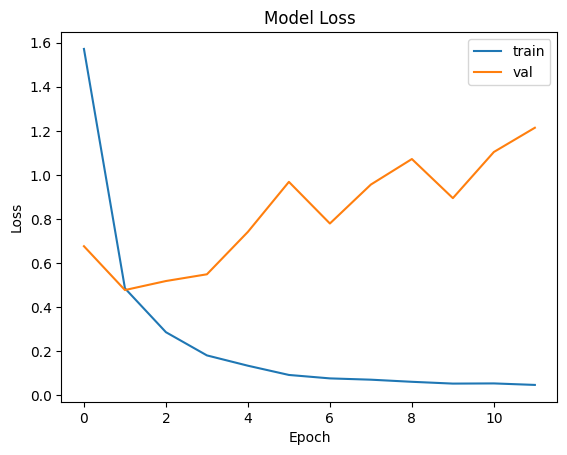

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

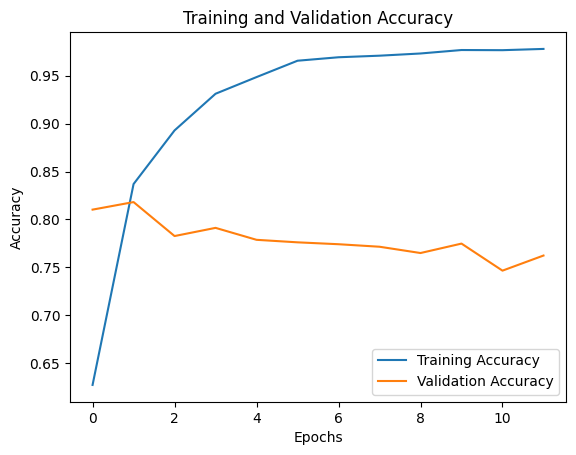

In [59]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 27)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 27, 100)              1405100   ['input_2[0][0]']             
                                                                                                  
 dropout_2 (Dropout)         (None, 27, 100)              0         ['embedding_1[0][0]']         
                                                                                                  
 multi_head_attention_1 (Mu  (None, 27, 100)              322500    ['dropout_2[0][0]',           
 ltiHeadAttention)                                                   'dropout_2[0][0]',     

In [61]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(report)

48/48 [==============================] - 2s 32ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       869
           1       0.87      0.68      0.76       654

    accuracy                           0.82      1523
   macro avg       0.83      0.80      0.81      1523
weighted avg       0.83      0.82      0.81      1523



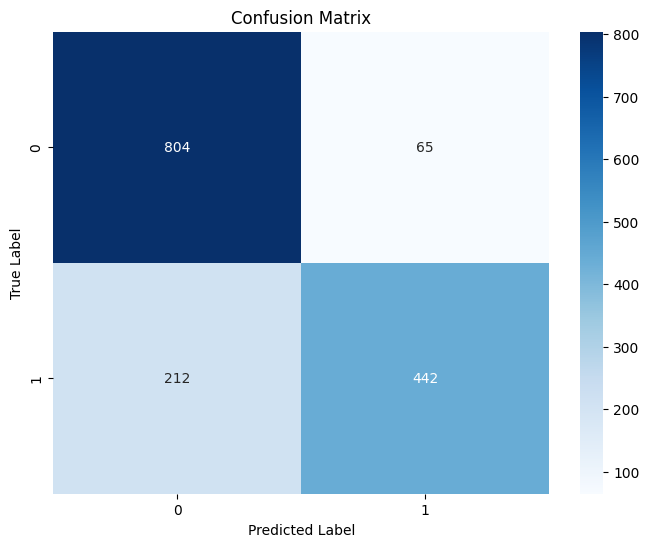

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [64]:
# Load the test data
test_df = pd.read_csv('/content/test.csv')

# Clean the text data
test_df["clean_text"] = test_df["text"].apply(clean_data)

# Preprocess the text data
test_df["text_prepro"] = test_df["clean_text"].apply(preprocess_data)

# Convert the preprocessed text into sequences
test_sequences = [[word2vec_model.wv.key_to_index[word] for word in preprocess_text2(doc) if word in word2vec_model.wv.key_to_index]
                  for doc in test_df['text_prepro']]

# Pad the sequences to the same length as the training data
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

print(test_padded_sequences)


<ipython-input-2-2c49a32f4f22>:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


[[  192  1721    57 ...     0     0     0]
 [  402   217   804 ...     0     0     0]
 [  142     2   586 ...     0     0     0]
 ...
 [  763   541    54 ...     0     0     0]
 [ 4805   175   115 ...     0     0     0]
 [11737   638  1305 ...     0     0     0]]


In [65]:
# Make predictions on the test data
predictions = model.predict(test_padded_sequences)

# Convert predictions to class labels (if necessary)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

102/102 [==============================] - 3s 33ms/step
[0 1 1 ... 1 1 1]


In [66]:
# Save predictions to a CSV file
submission_df = pd.DataFrame({'id': test_df['id'],'text': test_df['text'], 'target': predicted_classes})
submission_df.to_csv('/content/predictions.csv', index=False)

print("Predictions saved to /content/predictions.csv")

Predictions saved to /content/predictions.csv
